In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

df = pd.read_csv('confirm_7d250.csv', 
    dtype={'id':int, 'Date':object, 'inc':int}, 
    parse_dates=['Date'], 
    infer_datetime_format=True)
df.head(5)

,Date,id,inc,inc_id
0,2020-01-23,109,1,0
1,2020-01-23,214,1,0
2,2020-01-23,225,1,0
3,2020-01-23,638,1,0
4,2020-01-23,1275,1,0


In [3]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('7day')

inc_0 = np.zeros(87)
for i in range(87):
    inc_0[i] = df[(df['Date']==current_time) & (df['inc_id']==0)]['inc'].count()
    current_time += interval

In [4]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('7day')

inc_1 = np.zeros(87)
for i in range(87):
    inc_1[i] = df[(df['Date']==current_time) & ((df['inc_id']>=1) & (df['inc_id']<5))]['inc'].count()
    current_time += interval

In [5]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('7day')

inc_2 = np.zeros(87)
for i in range(87):
    inc_2[i] = df[(df['Date']==current_time) & ((df['inc_id']>=5) & (df['inc_id']<10))]['inc'].count()
    current_time += interval

In [6]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('7day')

inc_3 = np.zeros(87)
for i in range(87):
    inc_3[i] = df[(df['Date']==current_time) & (df['inc_id']>=10)]['inc'].count()
    current_time += interval

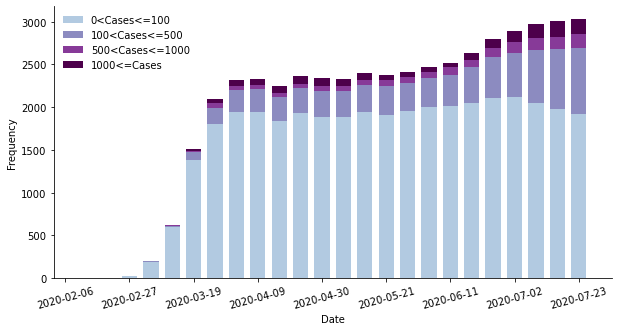

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
l = 3
r = 27
x = np.arange(mdates.datestr2num('2020-01-23')+l*7, mdates.datestr2num('2020-01-23') + r*7, 7)
x = [np.datetime64(int(c), 'D') for c in x]
plt.xticks(rotation=15)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=21))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
bar_width = 5.0
colors = plt.cm.BuPu(np.linspace(0.3, 1.0, 4))
p1 = ax.bar(x, inc_0[l:r], bar_width, color=colors[0])
p2 = ax.bar(x, inc_1[l:r], bar_width, bottom=inc_0[l:r], color=colors[1])
p3 = ax.bar(x, inc_2[l:r], bar_width, bottom=inc_0[l:r] + inc_1[l:r],  color=colors[2])
p4 = ax.bar(x, inc_3[l:r], bar_width, bottom=inc_0[l:r] + inc_1[l:r] + inc_2[l:r],  color=colors[3])
# plt.grid(linestyle='-.', dashes=[20, 10])
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('0<Cases<=100', '100<Cases<=500', '500<Cases<=1000', '1000<=Cases'), loc = 2, frameon=False)
#plt.yticks(fontsize=15)
#plt.xticks(fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Date')
plt.savefig('confirmed.pdf', format='pdf')
plt.show()

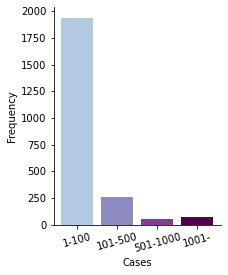

In [330]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(3, 4))
d = 10
x = ['1-100', '101-500', '501-1000', '1001-']
plt.xticks(rotation=15)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
colors = plt.cm.BuPu(np.linspace(0.3, 1.0, 4))
p1 = ax.bar(x, [inc_0[d], inc_1[d], inc_2[d], inc_3[d]], color=colors)
# plt.grid(linestyle='-.', dashes=[20, 10])
# plt.legend((p1[0], p2[0], p3[0], p4[0]), ('0<Cases<=100', '100<Cases<=500', '500<Cases<=1000', '1000<=Cases'), loc = 2, frameon=False)
#plt.yticks(fontsize=15)
#plt.xticks(fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Cases')
plt.savefig('confirmed_0.svg', format='svg')
plt.show()

In [288]:
[inc_0[d], inc_1[d], inc_2[d], inc_3[d]]

[25.0, 0.0, 0.0, 0.0]

In [289]:
inc_1

array([   0.,    0.,    0.,    0.,    0.,    0.,    4.,   23.,  101.,
        191.,  256.,  268.,  279.,  287.,  305.,  302.,  315.,  335.,
        332.,  337.,  373.,  413.,  472.,  518.,  619.,  696.,  767.,
        749.,  765.,  736.,  753.,  710.,  697.,  737.,  811.,  815.,
        854.,  945., 1006., 1080., 1228., 1236., 1319., 1338., 1339.,
       1348., 1347., 1344., 1267., 1267., 1275., 1206., 1204., 1131.,
       1058.,  906.,  774.,  771.,  679.,  696.,  659.,  627.,  665.,
        722.,  680.,  667.,  681.,  632.,  550.,  476.,  391.,  346.,
        330.,  292.,  296.,  330.,  444.,  598.,  794., 1008., 1161.,
       1227., 1272., 1304., 1275., 1310., 1314.])